# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

#Define empty lists to store values
cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []

#Looping through cities to make api calls using city as query
i = 1
for city in cities:
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
#Extracting data. Missing data is handled by try and except  
    try:
        
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"Processing record {i}|{city}")
        i+=1
    except (KeyError):
        print("City not found. skipping.")

Processing record 1|skibbereen
Processing record 2|koumac
Processing record 3|birjand
Processing record 4|sao joao da barra
Processing record 5|yar-sale
Processing record 6|puerto ayora
Processing record 7|pangody
City not found. skipping.
Processing record 8|cayenne
Processing record 9|qaanaaq
City not found. skipping.
Processing record 10|tuktoyaktuk
Processing record 11|wanaraja
Processing record 12|kloulklubed
Processing record 13|tiksi
Processing record 14|upernavik
Processing record 15|georgetown
Processing record 16|bredasdorp
Processing record 17|nome
Processing record 18|cornelio procopio
Processing record 19|ushuaia
Processing record 20|kostino
City not found. skipping.
Processing record 21|khatanga
Processing record 22|mehamn
Processing record 23|casa nova
City not found. skipping.
Processing record 24|jamestown
Processing record 25|balabac
Processing record 26|longyearbyen
Processing record 27|itarema
Processing record 28|hobart
Processing record 29|pecos
City not found. sk

Processing record 245|kavieng
Processing record 246|tokur
Processing record 247|haines junction
Processing record 248|kalavad
Processing record 249|trincomalee
Processing record 250|gori
Processing record 251|touros
Processing record 252|sao filipe
Processing record 253|talnakh
Processing record 254|deputatskiy
Processing record 255|ilulissat
Processing record 256|sorland
Processing record 257|bungu
Processing record 258|tura
Processing record 259|dungarpur
Processing record 260|vila velha
Processing record 261|ornskoldsvik
Processing record 262|datong
Processing record 263|uvira
Processing record 264|barcelona
Processing record 265|tukan
Processing record 266|paita
Processing record 267|beaumont
Processing record 268|kruisfontein
Processing record 269|normandin
Processing record 270|alofi
Processing record 271|hasaki
Processing record 272|nikolskoye
Processing record 273|korop
Processing record 274|krasnoselkup
Processing record 275|vardo
City not found. skipping.
Processing record 27

Processing record 498|fonte boa
Processing record 499|campbellsville
Processing record 500|orodara
Processing record 501|ternate
Processing record 502|skagen
Processing record 503|los llanos de aridane
Processing record 504|nouakchott
Processing record 505|taltal
Processing record 506|carauari
Processing record 507|cap-aux-meules
Processing record 508|san jeronimo
Processing record 509|morehead
Processing record 510|pilar
Processing record 511|te anau
Processing record 512|manono
Processing record 513|listvyagi
Processing record 514|stornoway
Processing record 515|uspenskoye
Processing record 516|prainha
Processing record 517|buta
Processing record 518|kitaibaraki
Processing record 519|tornio
Processing record 520|olafsvik
Processing record 521|la ronge
Processing record 522|luganville
Processing record 523|ambon
City not found. skipping.
Processing record 524|fernie
Processing record 525|samoylovka
Processing record 526|kenora
Processing record 527|grand-lahou
City not found. skipping

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
# Convert array of JSONs into Pandas DataFrame

weather_dict = {"City": city_name,
                "Latitude": lat,
                "Longitude":lng,
                "Max Temp":max_temp,
                "Humidity":humidity,
                "Cloudiness":cloudiness,
                "Wind Speed":wind_speed,
                "Country":country,
                "Date":date}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Skibbereen,51.5500,-9.2667,44.60,93,75,17.27,IE,1611954941
1,Koumac,-20.5667,164.2833,79.20,72,1,4.65,NC,1611954941
2,Birjand,32.8663,59.2211,48.20,12,0,11.50,IR,1611954941
3,São João da Barra,-21.6403,-41.0511,82.40,65,0,20.71,BR,1611954942
4,Yar-Sale,66.8333,70.8333,-41.37,80,16,4.56,RU,1611954942


In [17]:
# Exporting data to csv
weather_data.to_csv("cities.csv")

In [3]:
# Read in csv to avoid another API call
# Need to change weather_data variable to weather before final run and need help getting images into the output folder
weather = pd.read_csv("cities.csv")
weather.head()

,Unnamed: 0,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Skibbereen,51.5500,-9.2667,44.60,93,75,17.27,IE,1611954941
1,1,Koumac,-20.5667,164.2833,79.20,72,1,4.65,NC,1611954941
2,2,Birjand,32.8663,59.2211,48.20,12,0,11.50,IR,1611954941
3,3,São João da Barra,-21.6403,-41.0511,82.40,65,0,20.71,BR,1611954942
4,4,Yar-Sale,66.8333,70.8333,-41.37,80,16,4.56,RU,1611954942


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [4]:
humidity_check = weather["Humidity"].describe(include = "all")
humidity_check

count    562.000000
mean      72.208185
std       20.454229
min        1.000000
25%       63.000000
50%       77.500000
75%       87.000000
max      100.000000
Name: Humidity, dtype: float64

In [ ]:
#  Get the indices of cities that have humidity over 100%.
# There doesn't appear to be an entry with humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

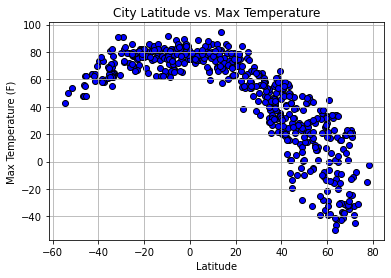

In [5]:
# Create scatter plot to show Latitude vs. Temperature
plt.scatter(weather["Latitude"], weather["Max Temp"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs. Max Temperature')
plt.savefig('output_data/Lat_vs_Temp_plot')
plt.show()

## Latitude vs. Humidity Plot

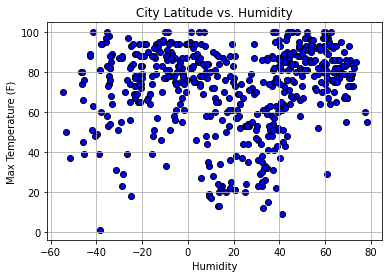

In [15]:
# Create scatter plot to show Latitude vs. Humidity
plt.scatter(weather["Latitude"], weather["Humidity"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.xlabel('Humidity')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs. Humidity')
plt.savefig('output_data/Lat_vs_Humidity_plot')
plt.show()

## Latitude vs. Cloudiness Plot

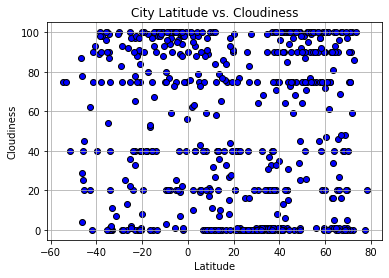

In [17]:
# Create scatter plot to show Latitude vs. Cloudiness
plt.scatter(weather["Latitude"], weather["Cloudiness"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'City Latitude vs. Cloudiness')
plt.savefig('output_data/Lat_vs_Cloudiness_plot')
plt.show()

## Latitude vs. Wind Speed Plot

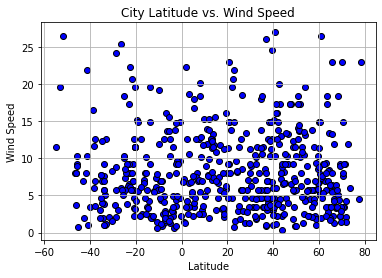

In [18]:
# Create scatter plot to show Latitude vs. Wind Speed
plt.scatter(weather["Latitude"], weather["Wind Speed"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f'City Latitude vs. Wind Speed')
plt.savefig('output_data/Lat_vs_Wind_Speed_plot')
plt.show()

## Linear Regression

In [39]:
# Define latitude for Northern and Southern Hemispheres
Northern_Hemisphere = weather.loc[weather["Latitude"] >= 0,:]
Southern_Hemisphere = weather.loc[weather["Latitude"] < 0,:]

# Perform linear regression on each relationship
x_values = weather['Latitude']
y_values = weather['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      23.366066
1      80.218091
2      38.095057
3      81.064446
4      11.317726
         ...    
557    49.466928
558    59.745065
559    70.971016
560    30.683143
561    43.044373
Name: Latitude, Length: 562, dtype: float64


The r-squared is: -0.7703215368923558


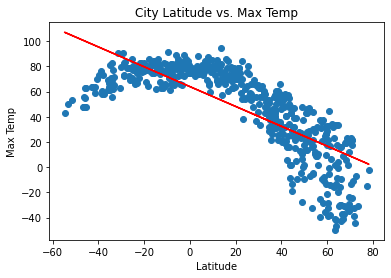

The low r values indicate a weak to no relationship between max temp and latitude.


In [40]:
# Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# label plot
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title(f'City Latitude vs. Max Temp')
plt.savefig('output_data/Lat_Lin_Reg_vs_Max_Temp_plot')

# Print r value
print(f"The r-squared is: {rvalue}")
    
# Show plot
plt.show()

print("The low r values indicate a weak to no relationship between max temp and latitude.")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8585419433989171


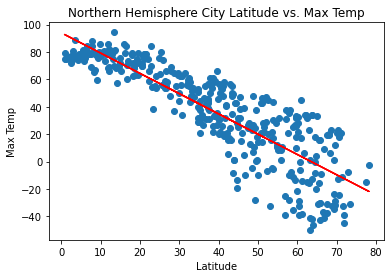

The low r values indicate a weak relationship between max temp and latitude.


In [41]:
# Perform Northern Hemisphere linear regression Max Temp vs. Latitude
x_values = Northern_Hemisphere["Latitude"]
y_values = Northern_Hemisphere["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# label plot
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title(f'Northern Hemisphere City Latitude vs. Max Temp')
plt.savefig('output_data/NH_Lat_Lin_Reg_vs_Max_Temp_plot')
    
# Print r value
print(f"The r-squared is: {rvalue}")
    
# Show plot
plt.show()

print("The low r values indicate a weak relationship between max temp and latitude.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.607706110469739


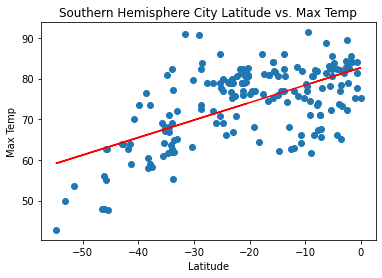

The high r values indicate a strong relationship between max temp and latitude.


In [42]:
# Perform Northern Hemisphere linear regression Max Temp vs. Latitude
x_values = Southern_Hemisphere["Latitude"]
y_values = Southern_Hemisphere["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# label plot
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title(f'Southern Hemisphere City Latitude vs. Max Temp')
plt.savefig('output_data/SH_Lat_Lin_Reg_vs_Max_Temp_plot')
    
# Print r value
print(f"The r-squared is: {rvalue}")
    
# Show plot
plt.show()

print("The high r values indicate a strong relationship between max temp and latitude.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3313497012437426


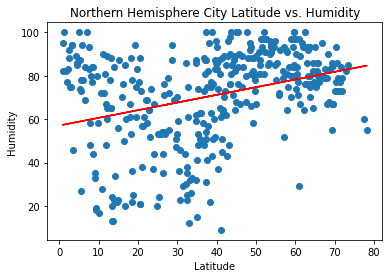

The high r values indicate a strong relationship between humidity and latitude.


In [43]:
# Perform Northern Hemisphere linear regression Humidity vs. Latitude
x_values = Northern_Hemisphere["Latitude"]
y_values = Northern_Hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# label plot
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f'Northern Hemisphere City Latitude vs. Humidity')
plt.savefig('output_data/NH_Lat_Lin_Reg_vs_Humidity_plot')
    
# Print r value
print(f"The r-squared is: {rvalue}")
    
# Show plot
plt.show()

print("The high r values indicate a strong relationship between humidity and latitude.")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.24116948832497487


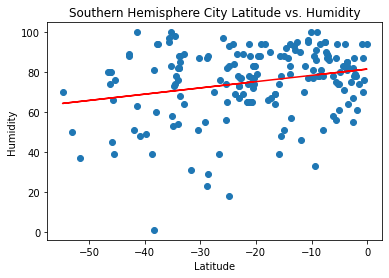

The high r values indicate a strong relationship between humidity and latitude.


In [44]:
# Perform Southern Hemisphere linear regression Humidity vs. Latitude
x_values = Southern_Hemisphere["Latitude"]
y_values = Southern_Hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# label plot
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f'Southern Hemisphere City Latitude vs. Humidity')
plt.savefig('output_data/SH_Lat_Lin_Reg_vs_Humidity_plot')
    
# Print r value
print(f"The r-squared is: {rvalue}")
    
# Show plot
plt.show()

print("The high r values indicate a strong relationship between humidity and latitude.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1559871536610528


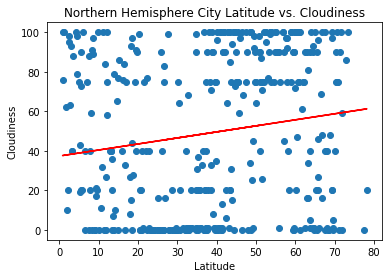

The high r values indicate a strong relationship between cloudiness and latitude.


In [45]:
# Perform Northern Hemisphere linear regression Latitude vs. Cloudiness
x_values = Northern_Hemisphere["Latitude"]
y_values = Northern_Hemisphere["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# label plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f'Northern Hemisphere City Latitude vs. Cloudiness')
plt.savefig('output_data/NH_Lat_Lin_Reg_vs_Cloudiness_plot')
    
# Print r value
print(f"The r-squared is: {rvalue}")
    
# Show plot
plt.show()

print("The high r values indicate a strong relationship between cloudiness and latitude.")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1954721108893327


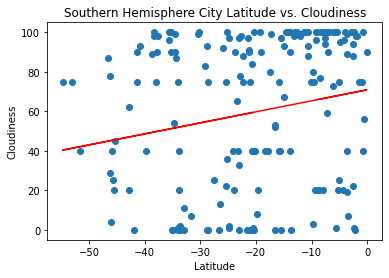

The high r values indicate a strong relationship between cloudiness and latitude.


In [46]:
# Perform Southern Hemisphere linear regression Latitude vs. Cloudiness
x_values = Southern_Hemisphere["Latitude"]
y_values = Southern_Hemisphere["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# label plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f'Southern Hemisphere City Latitude vs. Cloudiness')
plt.savefig('output_data/SH_Lat_Lin_Reg_vs_Cloudiness_plot')
    
# Print r value
print(f"The r-squared is: {rvalue}")
    
# Show plot
plt.show()

print("The high r values indicate a strong relationship between cloudiness and latitude.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.0626030244614481


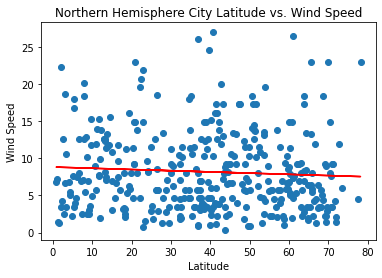

The low r values indicate a weak to no relationship between wind speed and latitude.


In [47]:
# Perform Northern Hemisphere linear regression Latitude vs. Wind Speed
x_values = Northern_Hemisphere["Latitude"]
y_values = Northern_Hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# label plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f'Northern Hemisphere City Latitude vs. Wind Speed')
plt.savefig('output_data/NH_Lat_Lin_Reg_vs_Wind_Speed_plot')
    
# Print r value
print(f"The r-squared is: {rvalue}")
    
# Show plot
plt.show()

print("The low r values indicate a weak to no relationship between wind speed and latitude.")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.14615673408230545


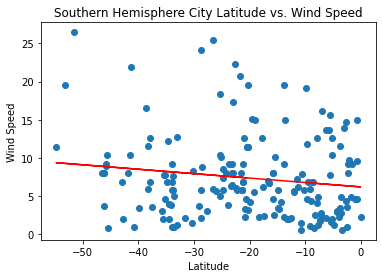

The low r values indicate a weak to no relationship between wind speed and latitude.


In [48]:
# Perform Southern Hemisphere linear regression Latitude vs. Wind Speed
x_values = Southern_Hemisphere["Latitude"]
y_values = Southern_Hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# label plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f'Southern Hemisphere City Latitude vs. Wind Speed')
plt.savefig('output_data/NH_Lat_Lin_Reg_vs_Wind Speed_plot')
    
# Print r value
print(f"The r-squared is: {rvalue}")
    
# Show plot
plt.show()

print("The low r values indicate a weak to no relationship between wind speed and latitude.")